In [137]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

from rasterio import plot
from rasterio.plot import show
from rasterio.windows import Window
from rasterio import features
from rasterio import Affine
from rasterio.plot import reshape_as_raster, reshape_as_image
from geopandas import GeoDataFrame

from collections import OrderedDict

from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage import data, util, filters, color
from skimage.morphology import watershed, disk
from skimage.filters import rank

from scipy import ndimage as ndi

In [138]:
%matplotlib inline
%pwd

'/home/jovyan/learn_python'

In [191]:
src = rasterio.open("image.tif")

In [192]:
src.count

4

In [193]:
src.shape

(6000, 6000)

In [194]:
x_corner = 3000
y_corner = 3000
x_inc = 500
y_inc = 500

3000


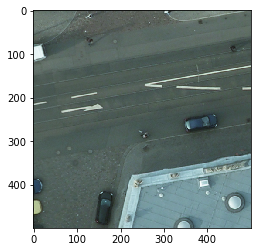

3500


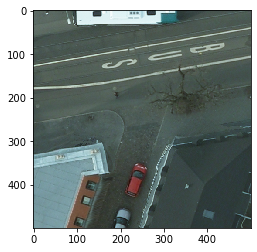

4000


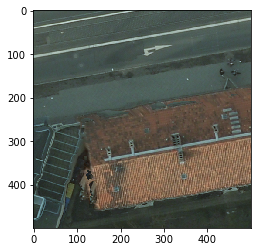

4500


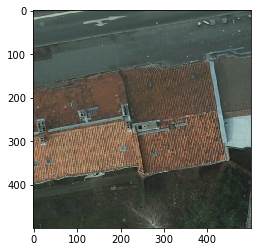

5000


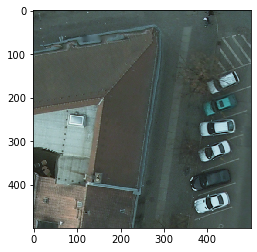

5500


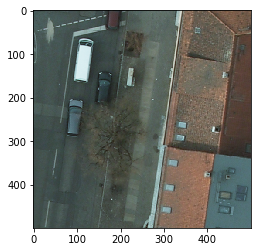

In [227]:
for x_start in range(x_corner, src.width, x_inc):
    print(x_start)
    image = src.read([1,2,3], window = Window(x_start, y_corner, x_inc, y_inc))
    show(image)

In [244]:
for x_start in range(x_corner, src.width, x_inc):
    img = reshape_as_image(src.read([3, 1, 2], window = Window(x_start, y_corner, x_inc, y_inc)))
    segments_slic = slic(img, n_segments=250, compactness=10, sigma=1)

In [245]:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(500, 500, 3)


In [246]:
def bsq_to_bip(img):
    new_image = np.transpose(img, [1, 2, 0])
    return new_image

def bip_to_bsq(img):
    new_image = np.transpose(img, [2, 0, 1])

In [247]:
print(img.shape)
new_image = bsq_to_bip(img)
print(new_image.shape)

(500, 500, 3)
(500, 3, 500)


In [231]:
src.transform

Affine(0.05, 0.0, 367276.5,
       0.0, -0.05, 5807362.6)

In [232]:
rasterio.transform.xy (src.transform, 3000, 3000)

(367426.525, 5807212.574999999)

In [233]:
src.transform*(3000, 3000)

(367426.5, 5807212.6)

In [180]:
print(type(segments_slic))
affine2 = Affine(a.a, a.b, (src.transform * (3000, 3000)) [0], a.d, a.e, (src.transform * (3000, 3000)) [1])
print(affine2)
segments_slic.dtype

<class 'numpy.ndarray'>
| 0.05, 0.00, 367426.50|
| 0.00,-0.05, 5807212.60|
| 0.00, 0.00, 1.00|


dtype('int64')

In [181]:
shps = features.shapes(segments_slic.astype('uint16'), transform=affine2)
records = []

for id, shp in enumerate(shps):
    item = {'geometry': shp[0], 'id': id+1, 'properties': 
            OrderedDict([('dn', np.int(shp[1]))]),
            'type': 'Feature'}
    records.append(item)

vec = GeoDataFrame.from_features(records)
vec.crs = src.crs

In [182]:
vec

,geometry,dn
0,"POLYGON ((367426.5 5807212.6, 367426.5 5807211...",0
1,"POLYGON ((367446.65 5807212.6, 367446.65 58072...",13
2,"POLYGON ((367438.6 5807212.6, 367438.6 5807212...",8
3,"POLYGON ((367429.95 5807212.6, 367429.95 58072...",2
4,"POLYGON ((367450.05 5807212.6, 367450.05 58072...",15
5,"POLYGON ((367440.9 5807212.6, 367440.9 5807211...",9
6,"POLYGON ((367444.95 5807212.6, 367444.95 58072...",12
7,"POLYGON ((367448.35 5807212.6, 367448.35 58072...",14
8,"POLYGON ((367435.2 5807212.6, 367435.2 5807212...",6
9,"POLYGON ((367433.3 5807212.6, 367433.3 5807212...",4


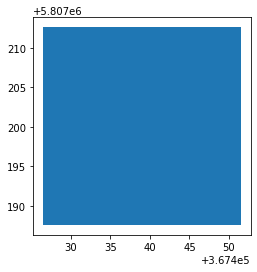

In [183]:
vec.plot()

In [184]:
vec.to_file("SLIC_all.shp")

In [185]:
%pwd
%cd wk2
%pwd
%system ls
%dirs
%system cd ..
%system pwd
%cd ..
%pwd
%dirs

/home/jovyan/learn_python/wk2
/home/jovyan/learn_python


[]

In [186]:
src.close()
rasterio.Env

rasterio.env.Env